In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_csv("Salary_data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data['Salary']

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [7]:
plt.plot(data['YearsExperience'],data['Salary'])

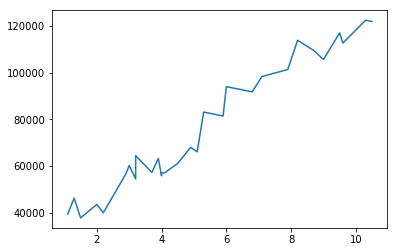

In [8]:
plt.show()

In [44]:
mean_sal=sum(data['Salary'])/(data['Salary'].count())
mean_exp=sum(data['YearsExperience'])/(data['YearsExperience'].count())
print('mean salary: '+str(mean_sal))
print('mean experience: '+str(mean_exp))

mean salary: 76003.0
mean experience: 5.31333333333


In [45]:
summax,summay=0,0
for row in data['Salary']:
    #print(row)
    a=row-mean_sal
    a=a*a
    summay=summay+a
for row in data['YearsExperience']:
    #print(row)
    a=row-mean_exp
    a=a*a
    summax=summax+a
var_y=summay/(data['Salary'].count()-1)
var_x=summax/(data['YearsExperience'].count()-1)
sd_x=math.sqrt(var_x)
sd_y=math.sqrt(var_y)
print('variance of salary : '+str(var_y))
print('variance of experience : '+str(var_x))
print('standard deviation of salary : '+str(sd_y))
print('standard deviation of experience : '+str(sd_x))

variance of salary : 751550960.414
variance of experience : 8.0536091954
standard deviation of salary : 27414.4297845823
standard deviation of experience : 2.8378881576627184


In [35]:
print(data['Salary'][0])

39343.0


In [59]:
#skip this step as this finds pearson's coefficient
zxzy=0
for i in range(0,data['Salary'].count()):
    a=(data['Salary'][i]-mean_sal)/sd_y
    b=(data['YearsExperience'][i]-mean_exp)/sd_x
    zxzy+=(a*b)
pear_r=zxzy/data['Salary'].count()-1
print(pear_r)

-0.0543664354609


In [62]:
cov_xy=0
for i in range(0,data['Salary'].count()):
    a=data['Salary'][i]-mean_sal
    b=data['YearsExperience'][i]-mean_exp
    cov_xy+=(a*b)
cov=cov_xy/(data['Salary'].count()-1)
print(cov)

76106.3034483


In [52]:
#to predict using pearson's co-efficient skip 
b=pear_r*(sd_y/sd_x)
a=mean_sal-(b*(mean_exp))
c=a+(b*1)
print(c)

78268.3109399


In [107]:
b=cov/var_x
a=mean_sal-(b*mean_exp)
cor_xy=cov/(sd_x*sd_y)
print(a,b)
print('correlation between salary and experience: '+str(cor_xy))
print(a+(b*3.7)) #fitting the data in model

25792.2001987 9449.96232146
correlation between salary and experience: 0.978241618489
60757.0607881


In [85]:
def partial_difference_o0(o0,o1):
    a=0
    for i in range(0,data['Salary'].count()):
        a+=o0+(o1*data['YearsExperience'][i])-data['Salary'][i]
    return a/data['Salary'].count()

In [86]:
def partial_difference_o1(o0,o1):
    a=0
    for i in range(0,data['Salary'].count()):
        a+=(o0+(o1*data['YearsExperience'][i])-data['Salary'][i])*data['YearsExperience'][i]
    return a/data['Salary'].count()

In [109]:
cur_o0=0
cur_o1=0
prev_o0=0
prev_o1=0
learning_rate=0.01
for i in range(0,10000):
    if(i!=0 and abs(cur_o0-prev_o0)<0.0001):
        #print('came',i)
        break
    a=partial_difference_o0(cur_o0,cur_o1)
    b=partial_difference_o1(cur_o0,cur_o1)
    prev_o0=cur_o0
    prev_o1=cur_o1
    cur_o0=cur_o0-(learning_rate*a)
    cur_o1=cur_o1-(learning_rate*b)
print(cur_o0,cur_o1)

25792.1530554 9449.96931732


In [108]:
z=cur_o0+(cur_o1*3.7)
print(z)

60757.0395295
